Problem Statement:
A stock price always fluctuates, but is there a relation between a closing price and its moving averages?
An analyst wants to showcase how the stock would move, he has 5 years of stock price data with him on which he needs to perform the analysis.

Objective:
Find the possible futuristic movement
of the stock 'GOOG" based on its price for the last 5 years.

Perform the following steps:
1. Get 5 years of data from Finance Package with Ticker Symbol 'GOOG'
2. Create 50DMA and 200DMA (Daily Moving Average)
3. Plot it with the Actual Price.
4. Basic EDA on the Data.
5. Fit Statsmodel OLS to find the best possible features

In [16]:
import yfinance as yahooFinance
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings. filterwarnings ('ignore')
%matplotlib inline

In [17]:
google = yahooFinance.Ticker ('GOOG')
# 5 years of data
df = google.history('5Y')

In [18]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-02-19 00:00:00-05:00,55.500000,56.094501,55.500000,55.928001,20928000,0.0,0.0
2019-02-20 00:00:00-05:00,55.999500,56.170502,55.264000,55.689999,21756000,0.0,0.0
2019-02-21 00:00:00-05:00,55.542000,55.597000,54.625999,54.848499,28302000,0.0,0.0
2019-02-22 00:00:00-05:00,55.044998,55.562000,54.779999,55.518501,20990000,0.0,0.0
2019-02-25 00:00:00-05:00,55.799999,55.926998,55.363499,55.470001,28262000,0.0,0.0


In [19]:
df.shape

(1259, 7)

In [20]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.0,1259.000000
mean,100.964092,102.129928,99.929824,101.054122,2.887268e+07,0.0,0.015886
std,30.173199,30.442623,29.881276,30.151137,1.280616e+07,0.0,0.563660
min,52.145000,52.374500,50.676800,51.811501,6.936000e+06,0.0,0.000000
25%,71.974251,72.459000,71.227749,71.939751,2.076335e+07,0.0,0.000000
50%,102.825996,103.927498,101.500000,102.751503,2.579800e+07,0.0,0.000000
75%,129.836746,131.246750,128.252502,129.617249,3.289900e+07,0.0,0.000000
max,154.009995,155.199997,152.919998,154.839996,1.241400e+08,0.0,20.000000


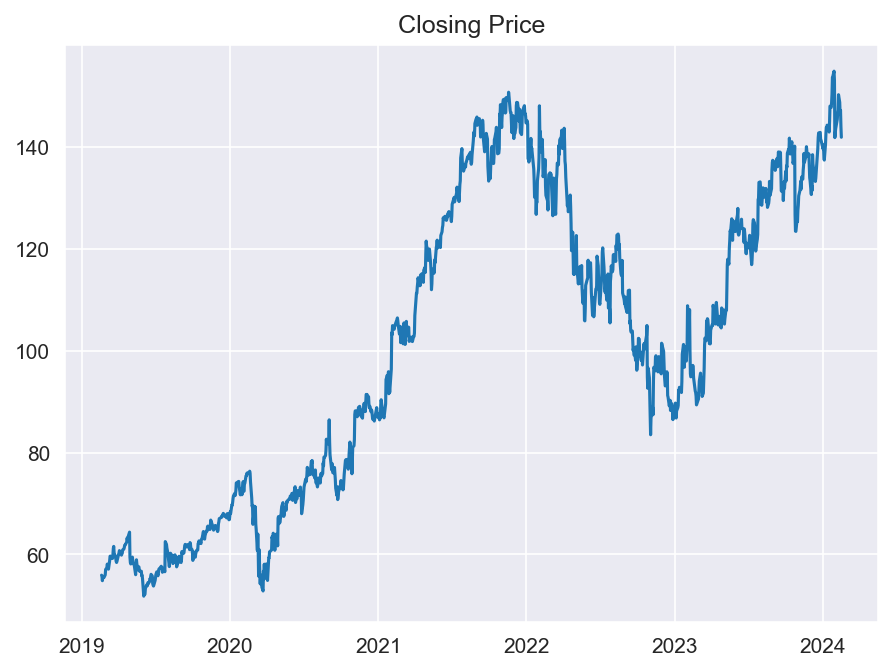

In [21]:
# Overview of closing price before calculating DMAs
sns.set_style('darkgrid')
plt.figure(figsize = (7,5) ,dpi = 150)
plt.title('Closing Price')
plt.plot(df['Close'])

In [22]:
# Calculate 50DMA
df['fiftyDMA'] = df ['Close'].rolling (50).mean()
# Calculate 200DMA
df['thDMA'] = df['Close'].rolling(200).mean()
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,fiftyDMA,thDMA
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.0,1259.000000,1210.000000,1060.000000
mean,100.964092,102.129928,99.929824,101.054122,2.887268e+07,0.0,0.015886,101.024921,101.665748
std,30.173199,30.442623,29.881276,30.151137,1.280616e+07,0.0,0.563660,29.048787,25.464948
min,52.145000,52.374500,50.676800,51.811501,6.936000e+06,0.0,0.000000,55.710860,59.454700
25%,71.974251,72.459000,71.227749,71.939751,2.076335e+07,0.0,0.000000,71.504618,74.001101
50%,102.825996,103.927498,101.500000,102.751503,2.579800e+07,0.0,0.000000,101.233600,104.635652
75%,129.836746,131.246750,128.252502,129.617249,3.289900e+07,0.0,0.000000,129.023310,123.908701
max,154.009995,155.199997,152.919998,154.839996,1.241400e+08,0.0,20.000000,146.183850,139.273730


In [23]:
df.drop(columns = ['Dividends', 'Stock Splits'], inplace = True)
df.head()

,Open,High,Low,Close,Volume,fiftyDMA,thDMA
Date,,,,,,,
2019-02-19 00:00:00-05:00,55.500000,56.094501,55.500000,55.928001,20928000,NaN,NaN
2019-02-20 00:00:00-05:00,55.999500,56.170502,55.264000,55.689999,21756000,NaN,NaN
2019-02-21 00:00:00-05:00,55.542000,55.597000,54.625999,54.848499,28302000,NaN,NaN
2019-02-22 00:00:00-05:00,55.044998,55.562000,54.779999,55.518501,20990000,NaN,NaN
2019-02-25 00:00:00-05:00,55.799999,55.926998,55.363499,55.470001,28262000,NaN,NaN


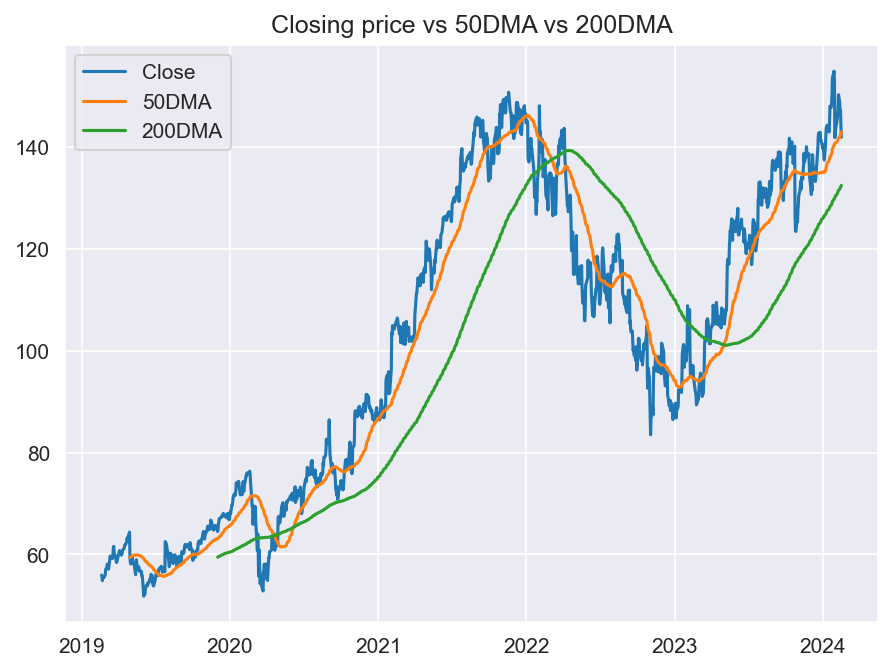

In [25]:
# Plot Closing price vs 50DMA vs 200DMA
sns.set_style('darkgrid')
plt.figure(figsize = (7,5), dpi = 150)
plt.title('Closing price vs 50DMA vs 200DMA')
plt.plot (df['Close'], label = 'Close')
plt.plot (df['fiftyDMA'], label = '50DMA')
plt.plot(df['thDMA'], label = '200DMA')
plt.legend()

Inferences from the above graph.
1. 50DMA and 200DMA are fairly good indicators of how the stock is moving.
2. If the closing price is above the the 50DMA or 200DMA, it is usually on the uptrend or bullish.
3. If the closing price is below the 50DMA or 200DMA, it usually means that it is in a downd trend.
4. Every point where 50DMA and 200DMA intersect, the market usually reverses its trend (High -> Low | Low -> High)
5. The huge dip at the March 2020, indicates the Covid 19 market

### Finding the possible futuristic movement of the stock

<Axes: >

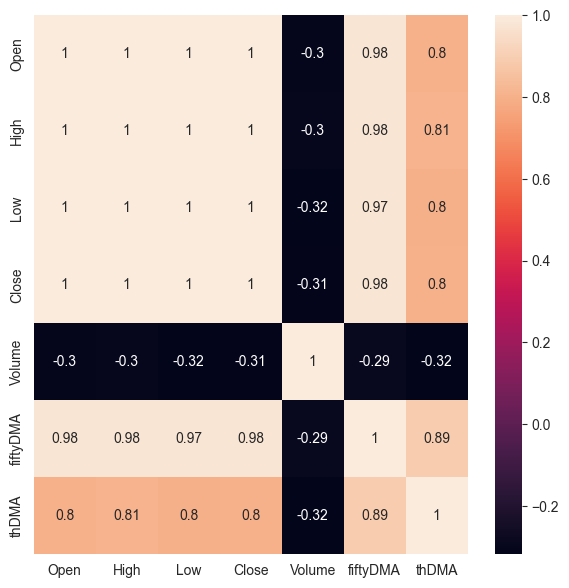

In [26]:
# Analyse correlation between each variable
plt.figure(figsize=(7,7), dpi = 100)
sns.heatmap(df.corr(), annot = True)

Inferences from the heatmap.
1. Closing price has very High correlation with almost all the variables except the volume.
2. There is strong multi collinearity between the variables as well.

<Axes: title={'center': 'Distplot 50 DMA'}, xlabel='fiftyDMA', ylabel='Density'>

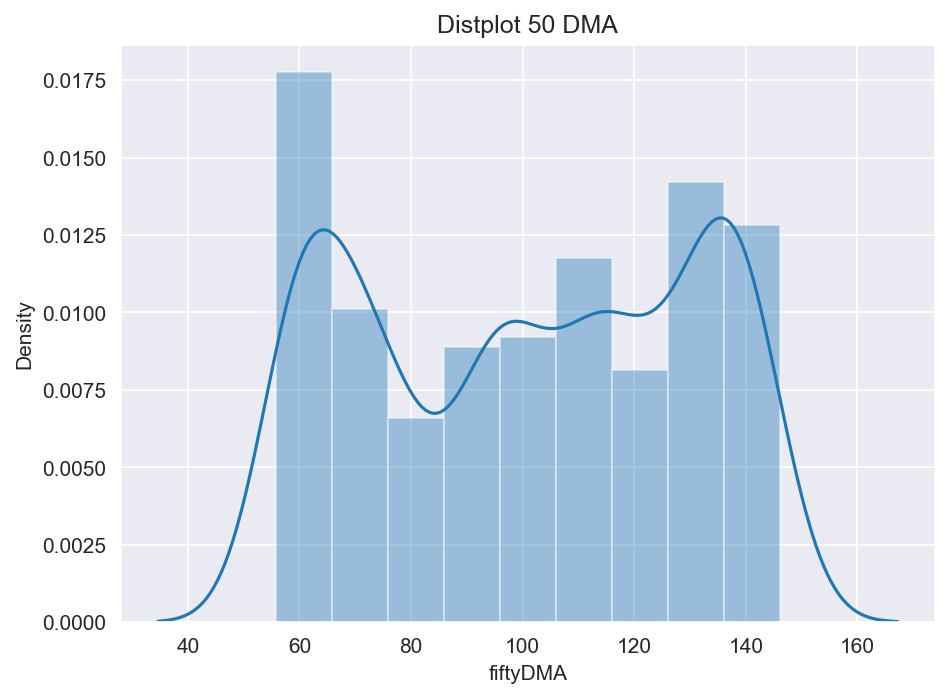

In [27]:
# Plot distplot of 50DMA
sns.set_style('darkgrid')
plt.figure(figsize=(7,5), dpi = 150)
plt.title( 'Distplot 50 DMA')
sns.distplot(df['fiftyDMA'] )

<Axes: title={'center': 'Distplot of Close Price'}, xlabel='Close', ylabel='Density'>

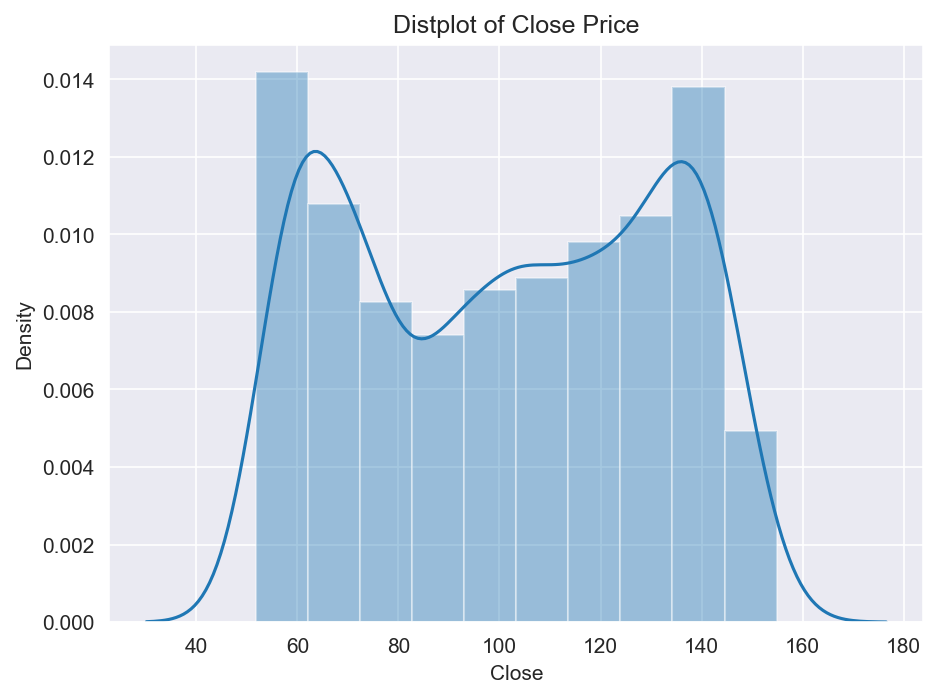

In [28]:
# Plot distplot of the close price
sns.set_style('darkgrid')
plt.figure(figsize=(7,5),dpi = 150)
plt.title('Distplot of Close Price')
sns.distplot (df ['Close'])

In [29]:
import statsmodels.formula.api as smf
model = smf.ols (formula = 'Close ~ fiftyDMA', data = df)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 2.373e+04
Date:                Fri, 16 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:22:21   Log-Likelihood:                -3981.7
No. Observations:                1210   AIC:                             7967.
Df Residuals:                    1208   BIC:                             7978.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5277      0.677      3.734      0.000       1.200       3.856
fiftyDMA       0.9920      0.006    154.031      0.000       0.979       1.005
==============================================================================
Omnibus:                       76.968   Durbin-Watson:                   0.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.444
Skew:                          -0.643   Prob(JB):                     2.29e-20
Kurtosis:                       3.372   Cond. No.                         381.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Inferences from the summary
1. Good r2 scores and coef
2. Since they are very highly correlated, ~ 1, it isn't wise to fit the model based on the parameters in real life.